**Edge Bundling**

Which Seems more better? 1 or 2?


![1 ](C:\Users\patil\Desktop\DVI\1.png)
![2 ](C:\Users\patil\Desktop\DVI\2.png)


![ ](C:\Users\patil\Desktop\DVI\3.png)



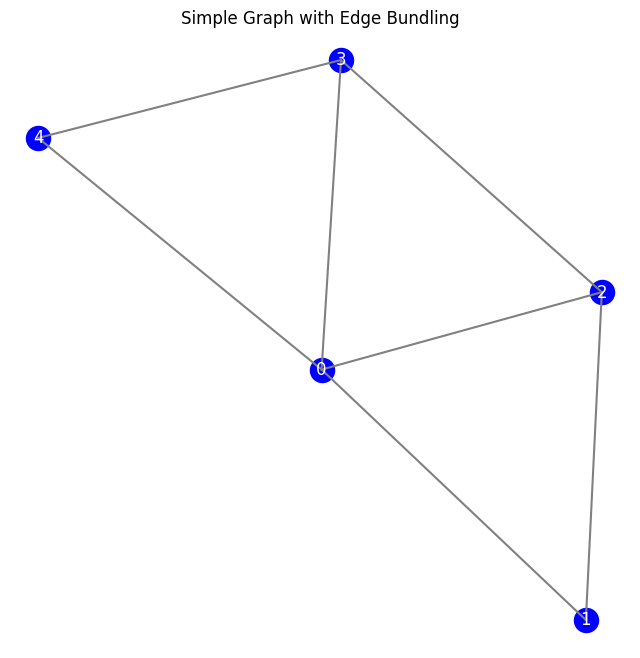

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a simple graph
G = nx.Graph()
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (3, 4), (2, 3)]
G.add_edges_from(edges)

# Define a function for edge bundling
def bundle_edges(G, alpha=0.6, segments=100):
    pos = nx.spring_layout(G)  # Compute graph layout
    edges = np.array(G.edges())
    positions = np.array([pos[node] for node in G.nodes()])
    
    new_edges = []
    for edge in edges:
        start, end = positions[edge[0]], positions[edge[1]]
        bundle = [alpha * start + (1 - alpha) * end for alpha in np.linspace(0, 1, segments)]
        new_edges.append(np.array(bundle))
        
    return np.array(new_edges), pos

# Apply edge bundling
bundled_edges, pos = bundle_edges(G)

# Plot the bundled graph
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='blue')

for edge in bundled_edges:
    plt.plot(edge[:, 0], edge[:, 1], color='gray')

nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')
plt.title('Simple Graph with Edge Bundling')
plt.axis('off')
plt.show()


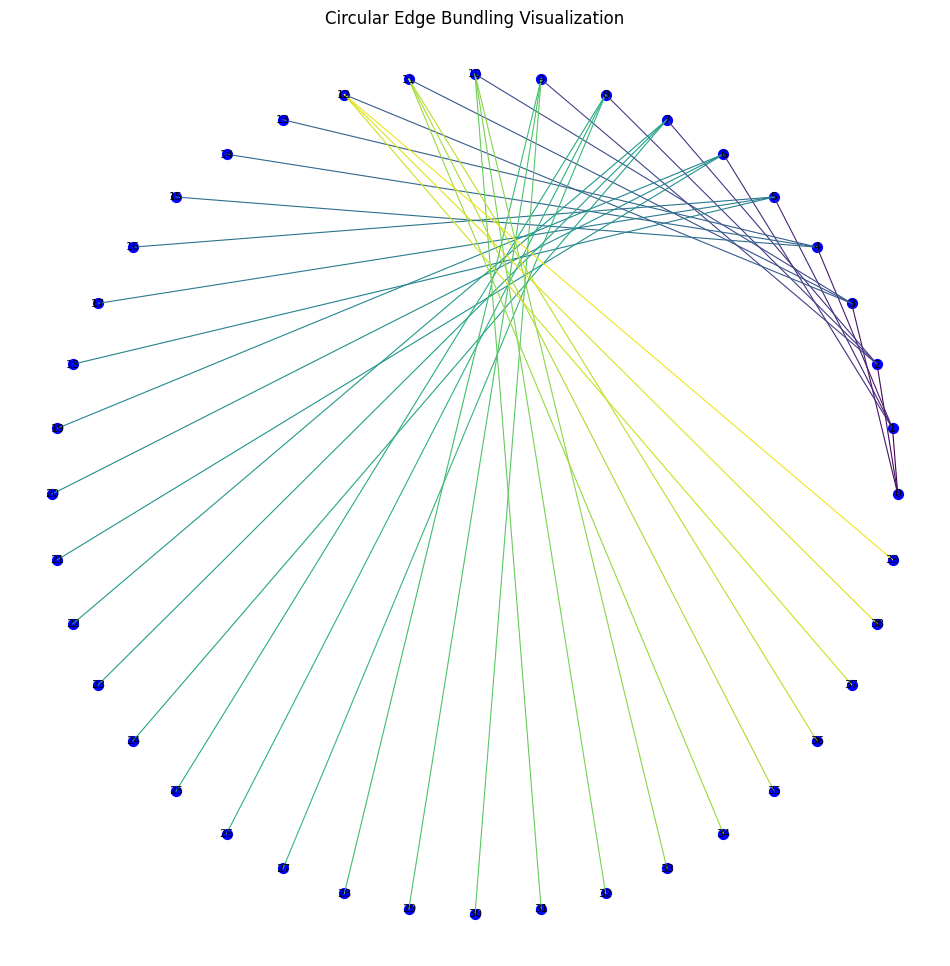

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a hierarchical graph (a balanced tree for simplicity)
G = nx.balanced_tree(r=3, h=3)  # r is the branching factor, h is the height

# Function to bundle edges in a circular layout
def circular_bundle_edges(G, pos, alpha=0.6, segments=100):
    edges = np.array(G.edges())
    positions = np.array([pos[node] for node in G.nodes()])
    
    new_edges = []
    for edge in edges:
        start, end = positions[edge[0]], positions[edge[1]]
        bundle = [alpha * start + (1 - alpha) * end for alpha in np.linspace(0, 1, segments)]
        new_edges.append(np.array(bundle))
        
    return np.array(new_edges)

# Compute circular layout
pos = nx.circular_layout(G)

# Apply circular edge bundling
bundled_edges = circular_bundle_edges(G, pos)

# Plot the bundled graph
plt.figure(figsize=(12, 12))
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')

# Draw bundled edges with varying colors for better visualization
for i, edge in enumerate(bundled_edges):
    plt.plot(edge[:, 0], edge[:, 1], color=plt.cm.viridis(i / len(bundled_edges)), linewidth=0.8)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title('Circular Edge Bundling Visualization')
plt.axis('off')
plt.show()


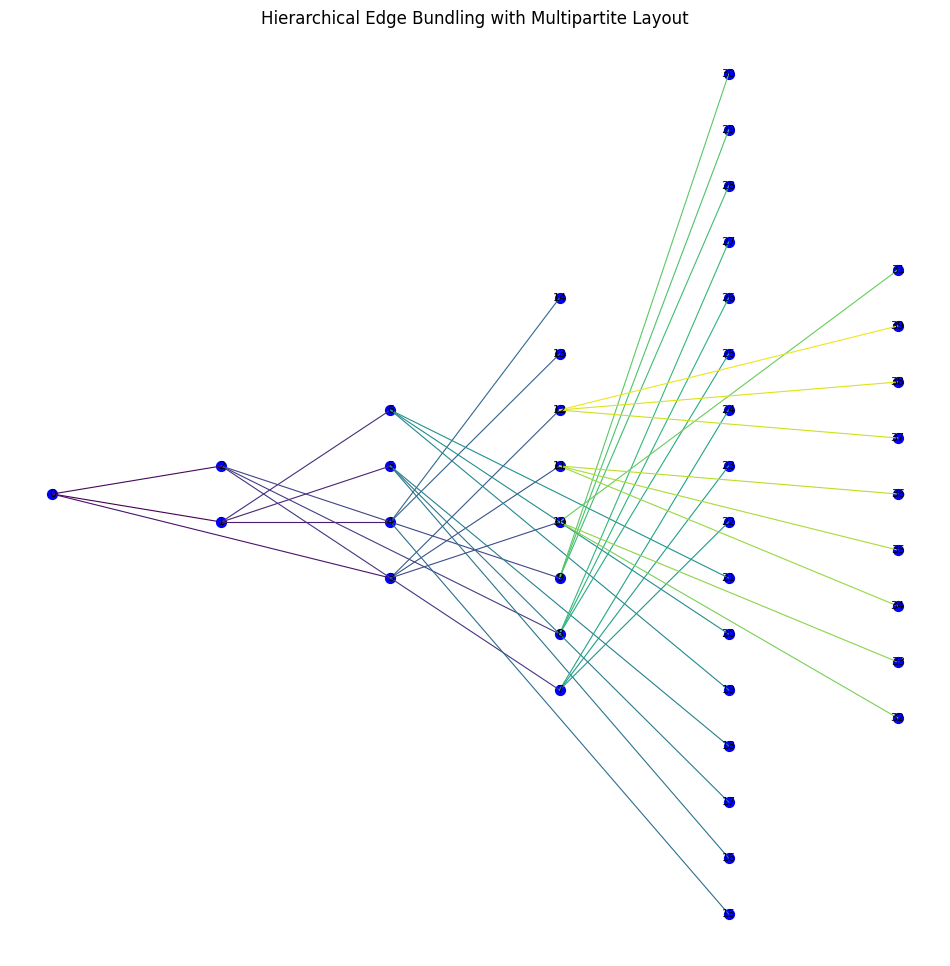

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a hierarchical graph
G = nx.balanced_tree(r=3, h=3)  # r is the branching factor, h is the height

# Add subset attribute to each node
for node in G.nodes:
    G.nodes[node]['subset'] = int(np.log2(node + 1))  # Example hierarchy

# Hierarchical Edge Bundling function
def hierarchical_edge_bundling(G, pos, alpha=0.6, segments=100):
    edges = np.array(G.edges())
    positions = np.array([pos[node] for node in G.nodes()])
    
    new_edges = []
    for edge in edges:
        start, end = positions[edge[0]], positions[edge[1]]
        bundle = [alpha * start + (1 - alpha) * end for alpha in np.linspace(0, 1, segments)]
        new_edges.append(np.array(bundle))
        
    return np.array(new_edges)

# Compute a multipartite layout
pos = nx.multipartite_layout(G, subset_key='subset')

# Apply hierarchical edge bundling
bundled_edges = hierarchical_edge_bundling(G, pos)

# Plot the bundled graph
plt.figure(figsize=(12, 12))
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')

# Draw bundled edges with varying colors for better visualization
for i, edge in enumerate(bundled_edges):
    plt.plot(edge[:, 0], edge[:, 1], color=plt.cm.viridis(i / len(bundled_edges)), linewidth=0.8)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title('Hierarchical Edge Bundling with Multipartite Layout')
plt.axis('off')
plt.show()


![ ](C:\Users\patil\Desktop\DVI\4.png)